 # MIVA-DTS305_Question1_Solution.ipynb

# 
# MIVA-DTS 305 - Data Quality and Data Wrangling
## Question 2: Web Scraping and Feature Engineering
# 
# **Name:**  |**Matric Number:** 
## Your Name | Your Matric Number
## Your Name | Your Matric Number
## Your Name | [Your Matric Number
## Your Name | Your Matric Number
## Your Name | Your Matric Number
## Your Name | Your Matric Number


# **Date:** 5 Dec, 2025
 

### Step 1: Import Required Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

### Step 2: Web Scraping from Books to Scrape

In [2]:
def scrape_books_toscrape():
    """
    Scrape book data from books.toscrape.com homepage
    """
    url = "http://books.toscrape.com/"
    
    try:
        # Send GET request
        response = requests.get(url)
        response.raise_for_status()  # Raise exception for bad status codes
        
        # Parse HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all book containers
        books = soup.find_all('article', class_='product_pod')
        
        data = []
        for book in books:
            # Extract title
            title_element = book.find('h3').find('a')
            title = title_element.get('title', '') if title_element else 'N/A'
            
            # Extract price
            price_element = book.find('p', class_='price_color')
            price_text = price_element.text if price_element else '£0.00'
            
            # Extract rating
            rating_element = book.find('p', class_='star-rating')
            rating_class = rating_element.get('class')[1] if rating_element else 'Zero'
            
            # Extract availability
            availability_element = book.find('p', class_='instock availability')
            availability = availability_element.text.strip() if availability_element else 'N/A'
            
            data.append({
                'Title': title,
                'Price_Text': price_text,
                'Rating_Text': rating_class,
                'Availability': availability
            })
        
        return pd.DataFrame(data)
        
    except requests.RequestException as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

# Scrape the data
print("Scraping data from books.toscrape.com...")
books_df = scrape_books_toscrape()

print(f"Scraped {len(books_df)} books")
print("\nFirst 5 rows:")
print(books_df.head())

Scraping data from books.toscrape.com...
Scraped 20 books

First 5 rows:
                                   Title Price_Text Rating_Text Availability
0                   A Light in the Attic     £51.77       Three     In stock
1                     Tipping the Velvet     £53.74         One     In stock
2                             Soumission     £50.10         One     In stock
3                          Sharp Objects     £47.82        Four     In stock
4  Sapiens: A Brief History of Humankind     £54.23        Five     In stock


### Step 3: Data Cleaning

In [3]:
def clean_price(price_text):
    """Convert price string to numerical value"""
    if isinstance(price_text, str):
        # Remove £ symbol and convert to float
        price_clean = price_text.replace('£', '')
        try:
            return float(price_clean)
        except ValueError:
            return 0.0
    return 0.0

books_df['Price'] = books_df['Price_Text'].apply(clean_price)

# Clean rating data
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5,
    'Zero': 0
}

books_df['Rating'] = books_df['Rating_Text'].map(rating_map).fillna(0).astype(int)

# Clean availability
books_df['Availability'] = books_df['Availability'].str.replace('\n', '').str.strip()

print("Data after cleaning:")
print(books_df[['Title', 'Price', 'Rating', 'Availability']].head())
print("\nData types:")
print(books_df.dtypes)
print("\nSummary statistics:")
print(books_df[['Price', 'Rating']].describe())

Data after cleaning:
                                   Title  Price  Rating Availability
0                   A Light in the Attic  51.77       3     In stock
1                     Tipping the Velvet  53.74       1     In stock
2                             Soumission  50.10       1     In stock
3                          Sharp Objects  47.82       4     In stock
4  Sapiens: A Brief History of Humankind  54.23       5     In stock

Data types:
Title            object
Price_Text       object
Rating_Text      object
Availability     object
Price           float64
Rating            int64
dtype: object

Summary statistics:
           Price     Rating
count  20.000000  20.000000
mean   38.048500   2.850000
std    15.135231   1.565248
min    13.990000   1.000000
25%    22.637500   1.000000
50%    41.380000   3.000000
75%    51.865000   4.000000
max    57.250000   5.000000


## Step 4: Feature Engineering

In [5]:
# Create affordability category
books_df['Affordability'] = books_df['Price'].apply(
    lambda x: 'Affordable' if x < 20 else 'Expensive'
)

# Calculate average rating by affordability category
avg_ratings = books_df.groupby('Affordability')['Rating'].mean()

print("Average ratings by affordability:")
print(avg_ratings)

# Count books by affordability
affordability_counts = books_df['Affordability'].value_counts()
print("\nNumber of books by affordability:")
print(affordability_counts)


Average ratings by affordability:
Affordability
Affordable    3.333333
Expensive     2.764706
Name: Rating, dtype: float64

Number of books by affordability:
Affordability
Expensive     17
Affordable     3
Name: count, dtype: int64


## Step 5: Data Visualization

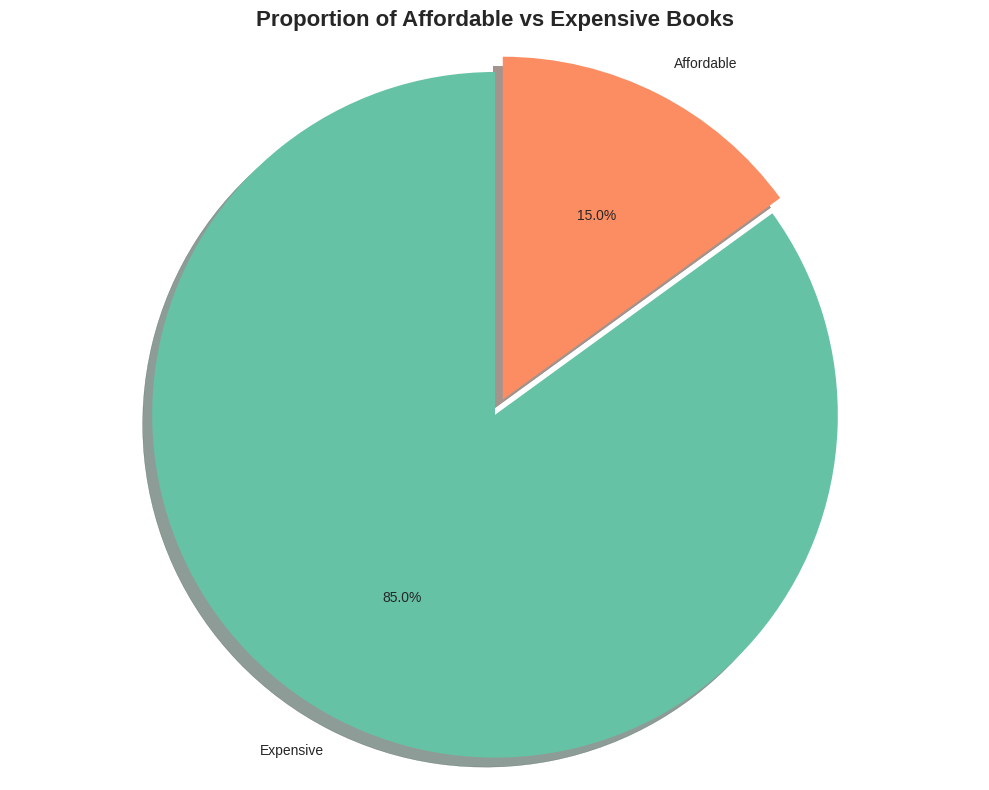

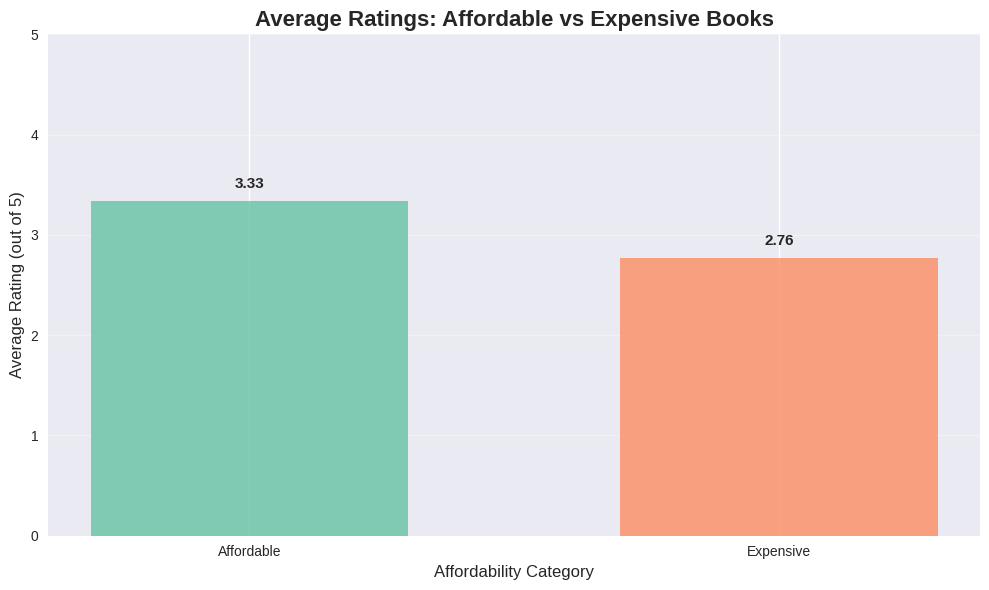

In [6]:
# Visualization 1: Pie chart for affordability proportion
plt.figure(figsize=(10, 8))

# Create pie chart
colors = ['#66c2a5', '#fc8d62']
plt.pie(affordability_counts.values, 
        labels=affordability_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        explode=(0.05, 0),
        shadow=True)

plt.title('Proportion of Affordable vs Expensive Books', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as circle
plt.tight_layout()
plt.savefig('affordability_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Visualization 2: Bar chart of average ratings
plt.figure(figsize=(10, 6))

bars = plt.bar(avg_ratings.index, avg_ratings.values, 
               color=['#66c2a5', '#fc8d62'], 
               alpha=0.8,
               width=0.6)

plt.title('Average Ratings: Affordable vs Expensive Books', fontsize=16, fontweight='bold')
plt.xlabel('Affordability Category', fontsize=12)
plt.ylabel('Average Rating (out of 5)', fontsize=12)
plt.ylim(0, 5)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('average_ratings_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

### Step 7: Save the Dataset


In [7]:
# Save cleaned and engineered dataset
output_columns = ['Title', 'Price', 'Rating', 'Availability', 'Affordability']
books_df[output_columns].to_csv('books_scraped_cleaned.csv', index=False)

print("Dataset saved as: books_scraped_cleaned.csv")
print("\n=== SCRAPING AND ENGINEERING SUMMARY ===")
print(f"Total books scraped: {len(books_df)}")
print(f"Affordable books (<£20): {affordability_counts.get('Affordable', 0)}")
print(f"Expensive books (≥£20): {affordability_counts.get('Expensive', 0)}")
print(f"Average rating - Affordable: {avg_ratings.get('Affordable', 0):.2f}")
print(f"Average rating - Expensive: {avg_ratings.get('Expensive', 0):.2f}")
print(f"Price range: £{books_df['Price'].min():.2f} - £{books_df['Price'].max():.2f}")

Dataset saved as: books_scraped_cleaned.csv

=== SCRAPING AND ENGINEERING SUMMARY ===
Total books scraped: 20
Affordable books (<£20): 3
Expensive books (≥£20): 17
Average rating - Affordable: 3.33
Average rating - Expensive: 2.76
Price range: £13.99 - £57.25
